## Gumbel-Softmax

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import gzip
f = gzip.open('mnist.pkl.gz')

In [3]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = np.load(f)

In [4]:
train_x[train_x > 0.5] = 1.0
train_x[train_x <= 0.5] = 0.0
valid_x[valid_x > 0.5] = 1.0
valid_x[valid_x <= 0.5] = 0.0
test_x[test_x > 0.5] = 1.0
test_x[test_x <= 0.5] = 0.0

In [5]:
from gumbel_bp import Gumbel_BP

In [6]:
model  =Gumbel_BP()

In [7]:
model.fit(x_train=train_x, x_valid=valid_x)

Epoch 1, loss: -147.652, val_loss: -159.044, time: 13.041
Epoch 2, loss: -126.095, val_loss: -129.540, time: 12.717
Epoch 3, loss: -113.717, val_loss: -117.910, time: 12.701
Epoch 4, loss: -113.532, val_loss: -110.101, time: 12.683
Epoch 5, loss: -102.617, val_loss: -105.660, time: 13.466
Epoch 6, loss: -100.181, val_loss: -101.068, time: 13.464
Epoch 7, loss: -103.460, val_loss: -98.425, time: 13.316
Epoch 8, loss: -91.412, val_loss: -96.163, time: 13.195
Epoch 9, loss: -95.686, val_loss: -93.729, time: 13.472
Epoch 10, loss: -99.912, val_loss: -92.763, time: 13.443
tau: 0.985141, lr:0.000990
Epoch 11, loss: -100.184, val_loss: -91.360, time: 13.515
Epoch 12, loss: -92.936, val_loss: -90.185, time: 13.607
Epoch 13, loss: -84.163, val_loss: -89.230, time: 13.325
Epoch 14, loss: -93.397, val_loss: -88.363, time: 13.468
Epoch 15, loss: -92.334, val_loss: -87.577, time: 13.334
Epoch 16, loss: -83.981, val_loss: -86.666, time: 14.249
Epoch 17, loss: -86.395, val_loss: -86.445, time: 15.637

In [8]:
reconstruct = model.predict(x_data=test_x[200:201])

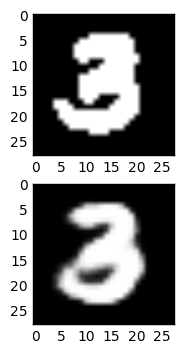

In [9]:
plt.gray()
plt.subplot(2, 1, 1)
plt.imshow(test_x[200:201].reshape(28, 28))
plt.subplot(2, 1, 2)
plt.imshow(reconstruct.reshape(28, 28))

In [10]:
encode = model.encoder(x_data=test_x[200:201])

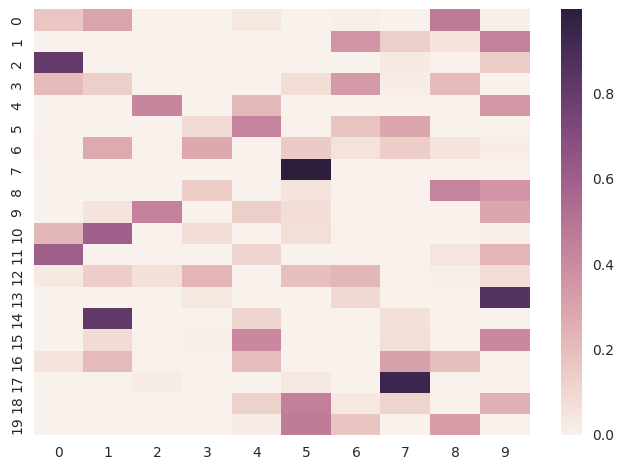

In [11]:
import seaborn as sns
sns.heatmap(encode)